In [ ]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import pandas as pd 
import datetime as dt
from matplotlib import pyplot as plt

In [ ]:
# Load in the data
dataset = pd.read_csv('/content/coin_Bitcoin.csv', index_col='Name', parse_dates=True)

In [ ]:
dataset.head()

,SNo,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Name,,,,,,,,,
Bitcoin,1,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
Bitcoin,2,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
Bitcoin,3,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
Bitcoin,4,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
Bitcoin,5,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
dataset.isna().any()

SNo          False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool

In [ ]:
# Getting some information on the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2862 entries, Bitcoin to Bitcoin
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Symbol     2862 non-null   object 
 2   Date       2862 non-null   object 
 3   High       2862 non-null   float64
 4   Low        2862 non-null   float64
 5   Open       2862 non-null   float64
 6   Close      2862 non-null   float64
 7   Volume     2862 non-null   float64
 8   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 223.6+ KB


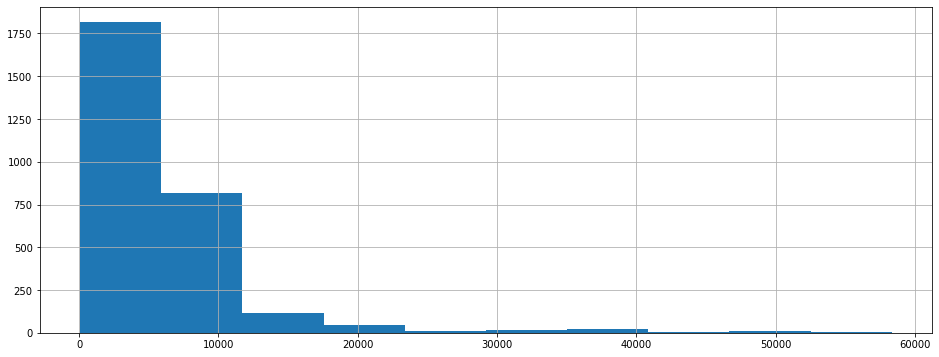

In [ ]:
# Plotting some of the data
dataset['High'].hist(figsize=(16,6))

In [ ]:
# Blurring out the first seven lines of the dataset for predictions
dataset.rolling(7).mean().head(20)

,SNo,High,Low,Open,Close,Volume,Marketcap
Name,,,,,,,
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,4.0,128.833714,106.684986,121.582000,118.842856,0.0,1.319866e+09
Bitcoin,5.0,125.572999,102.776414,118.944286,114.237143,0.0,1.269188e+09
Bitcoin,6.0,120.789286,97.583556,114.408572,110.308572,0.0,1.226013e+09


In [ ]:
training_set = dataset['Close']
training_set = pd.DataFrame(training_set)

In [ ]:
print(training_set)

                Close
Name                 
Bitcoin    144.539993
Bitcoin    139.000000
Bitcoin    116.989998
Bitcoin    105.209999
Bitcoin     97.750000
...               ...
Bitcoin  48824.426869
Bitcoin  49705.333316
Bitcoin  47093.853019
Bitcoin  46339.760083
Bitcoin  46188.451275

[2862 rows x 1 columns]


In [ ]:
# Doing the feature scaling in the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2861):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train)

[[[1.32429077e-03]
  [1.22789530e-03]
  [8.44922917e-04]
  ...
  [6.18027881e-04]
  [6.18897930e-04]
  [5.74301861e-04]]

 [[1.22789530e-03]
  [8.44922917e-04]
  [6.39951823e-04]
  ...
  [6.18897930e-04]
  [5.74301861e-04]
  [4.56194721e-04]]

 [[8.44922917e-04]
  [6.39951823e-04]
  [5.10148400e-04]
  ...
  [5.74301861e-04]
  [4.56194721e-04]
  [4.62194265e-04]]

 ...

 [[4.58811771e-01]
  [4.55945256e-01]
  [4.70082927e-01]
  ...
  [1.00000000e+00]
  [9.42012582e-01]
  [8.48350663e-01]]

 [[4.55945256e-01]
  [4.70082927e-01]
  [4.74913645e-01]
  ...
  [9.42012582e-01]
  [8.48350663e-01]
  [8.63678369e-01]]

 [[4.70082927e-01]
  [4.74913645e-01]
  [5.00639727e-01]
  ...
  [8.48350663e-01]
  [8.63678369e-01]
  [8.18238808e-01]]]


In [ ]:
# Making the imports to make the neural network
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Compiling the model 
regressor.compile(optimizer='adam', loss='binary_crossentropy')

# Fitting the model 
history = regressor.fit(X_train, y_train, epochs = 10, batch_size = 40)

Epoch 1/10
71/71 [==============================] - 16s 119ms/step - loss: 0.6651
Epoch 2/10
71/71 [==============================] - 8s 118ms/step - loss: 0.5400
Epoch 3/10
71/71 [==============================] - 12s 164ms/step - loss: 0.5191
Epoch 4/10
71/71 [==============================] - 12s 175ms/step - loss: 0.5109
Epoch 5/10
71/71 [==============================] - 8s 119ms/step - loss: 0.5077
Epoch 6/10
71/71 [==============================] - 8s 119ms/step - loss: 0.5047
Epoch 7/10
71/71 [==============================] - 8s 118ms/step - loss: 0.4914
Epoch 8/10
71/71 [==============================] - 8s 118ms/step - loss: 0.4898
Epoch 9/10
71/71 [==============================] - 8s 117ms/step - loss: 0.4796
Epoch 10/10
71/71 [==============================] - 8s 117ms/step - loss: 0.4561


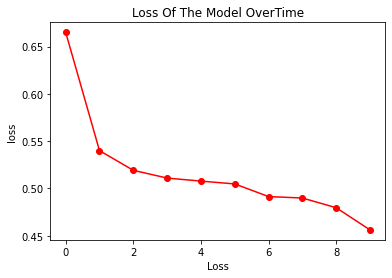

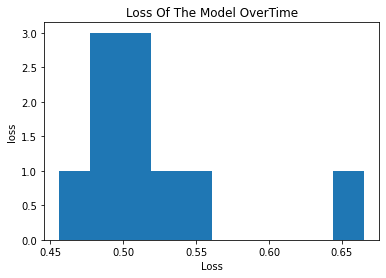

In [ ]:
# Plotting the loss of the model overtime
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string], 'ro-')
    plt.title("Loss Of The Model OverTime")
    plt.xlabel("Loss")
    plt.ylabel(string)
    plt.show()
    
def plot_histogram(history, string):
    plt.hist(history.history[string])
    plt.title("Loss Of The Model OverTime")
    plt.xlabel("Loss")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'loss')
plot_histogram(history, 'loss')

In [ ]:
!pip3 install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_datareader as web

In [ ]:
crypto_currency = 'BTC' 
against_currency = 'USD'

In [ ]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

In [ ]:
test_data = pd.read_csv('/content/BTC-USD.csv')

In [ ]:
print(test_data)

           Date          Open          High           Low         Close  \
0    2021-11-10  66953.335938  68789.625000  63208.113281  64995.230469   
1    2021-11-11  64978.890625  65579.015625  64180.488281  64949.960938   
2    2021-11-12  64863.980469  65460.816406  62333.914063  64155.941406   
3    2021-11-13  64158.121094  64915.675781  63303.734375  64469.527344   
4    2021-11-14  64455.371094  65495.179688  63647.808594  65466.839844   
..          ...           ...           ...           ...           ...   
361  2022-11-06  21285.056641  21345.376953  20920.191406  20926.486328   
362  2022-11-07  20924.621094  21053.246094  20489.972656  20602.816406   
363  2022-11-08  20600.671875  20664.607422  17603.544922  18541.271484   
364  2022-11-09  18543.761719  18590.458984  15682.692383  15880.780273   
365  2022-11-10  15877.056641  17990.945313  15877.056641  17819.916016   

        Adj Close        Volume  
0    64995.230469   48730828378  
1    64949.960938   35880633236

In [ ]:
total_dataset = pd.concat((training_set['Close'], test_data['Close']), axis=0) 

In [ ]:
actual_prices = test_data['Close'].values

In [ ]:
prediction_days = 60

In [ ]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
model_inputs = model_inputs.reshape(-1, 1)

In [ ]:
model_inputs = scaler.fit_transform(model_inputs)

In [ ]:
print(model_inputs)

[[0.26136727]
 [0.26460944]
 [0.27212026]
 [0.32764224]
 [0.34084669]
 [0.32450921]
 [0.36525687]
 [0.42236839]
 [0.47372714]
 [0.50249668]
 [0.49154473]
 [0.45326568]
 [0.39700424]
 [0.3638559 ]
 [0.43229043]
 [0.47002218]
 [0.42238859]
 [0.40933599]
 [0.40153418]
 [0.41845018]
 [0.40715125]
 [0.39662298]
 [0.30139354]
 [0.34535883]
 [0.32643978]
 [0.33091151]
 [0.33246467]
 [0.33656777]
 [0.29346488]
 [0.35464234]
 [0.37179013]
 [0.37084498]
 [0.34754884]
 [0.35607581]
 [0.39586749]
 [0.43543105]
 [0.42441937]
 [0.44898761]
 [0.47160897]
 [0.46429705]
 [0.61137513]
 [0.61711546]
 [0.58559612]
 [0.64591845]
 [0.63776132]
 [0.62970798]
 [0.66221253]
 [0.64663893]
 [0.67194472]
 [0.73141983]
 [0.72195727]
 [0.80682663]
 [0.81108966]
 [0.84013861]
 [0.77292971]
 [0.66437315]
 [0.68213835]
 [0.62947274]
 [0.61426498]
 [0.61121354]
 [0.99048907]
 [0.98957612]
 [0.97356317]
 [0.97988724]
 [1.        ]
 [0.96150191]
 [0.89300231]
 [0.89717215]
 [0.82808267]
 [0.85182808]
 [0.88364382]
 [0.86

In [ ]:
x_test = []

In [ ]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [ ]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
prediction_prices = regressor.predict(x_test)

prediction_prices = scaler.inverse_transform(prediction_prices)

12/12 [==============================] - 2s 29ms/step


In [ ]:
print(prediction_prices)

[[45088.215 44856.05  43031.008 ... 44678.25  42883.797 44064.902]
 [45348.207 45081.426 43333.785 ... 45077.32  43218.586 44387.48 ]
 [45616.836 45304.355 43611.977 ... 45459.938 43541.445 44698.96 ]
 ...
 [19357.904 18880.232 18949.502 ... 18954.154 18797.113 18706.271]
 [19433.557 18944.436 19022.318 ... 19013.902 18859.217 18760.885]
 [19493.115 18995.56  19090.37  ... 19067.352 18919.375 18815.559]]


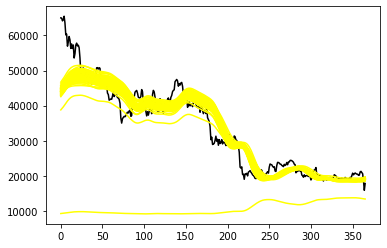

In [ ]:
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='yellow', label='Prediction Prices')
plt.show()


# Prediction of the next day

In [ ]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]

In [ ]:
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

print(real_data[0])

[[0.08905581]
 [0.08793418]
 [0.07704647]
 [0.07848584]
 [0.08564496]
 [0.07136533]
 [0.0738786 ]
 [0.06070272]
 [0.05377762]
 [0.07124524]
 [0.06890764]
 [0.06163489]
 [0.05891409]
 [0.06739579]
 [0.06513457]
 [0.07151083]
 [0.07446187]
 [0.07161305]
 [0.0691992 ]
 [0.06379469]
 [0.07548089]
 [0.08986525]
 [0.0863133 ]
 [0.08217356]
 [0.07393347]
 [0.07130609]
 [0.07190822]
 [0.06575848]
 [0.06394212]
 [0.06608037]
 [0.07062719]
 [0.0666493 ]
 [0.06426916]
 [0.06831181]
 [0.07401228]
 [0.06964933]
 [0.06571917]
 [0.06398895]
 [0.06638334]
 [0.06710372]
 [0.07434   ]
 [0.06987432]
 [0.08500529]
 [0.09860959]
 [0.08883657]
 [0.09507856]
 [0.09957832]
 [0.09589032]
 [0.09307038]
 [0.09285862]
 [0.08628884]
 [0.08730696]
 [0.10620828]
 [0.10894012]
 [0.10175654]
 [0.09522911]
 [0.05365402]
 [0.        ]
 [0.03910647]]


In [ ]:
prediction = regressor.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction[0][0]}")
print("\n\n\n\n")
print(prediction)

1/1 [==============================] - 2s 2s/step
Prediction: 19528.267578125





[[19528.268 19026.283 19146.803 19199.322 19680.309 19422.973 18989.244
  19503.785 19119.168 19502.299 19364.545 19334.469 19395.72  19210.428
  19401.32  19458.035 19340.021 19650.592 18908.262 19326.58  19197.805
  18789.31  19169.75  19173.377 19459.283 19423.865 19214.5   19523.05
  18534.484 18987.701 19047.914 19664.922 18985.602 19331.898 19191.24
  19320.75  13380.67  19574.34  19132.773 19051.807 19353.469 18897.535
  19348.777 19014.43  19155.246 19025.582 19076.12  19108.803 18972.674
  18866.736]]
